In [1]:
import os
import numpy as np
import pandas as pd 
#import modin.pandas as pd
from tqdm import tqdm
import re
import datetime
from p_tqdm import p_map
from functools import partial
import gc

In [2]:
! pip -V

pip 21.3.1 from /home/orzwang/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
df_mentor = pd.read_csv("mentor_list_verified.csv")
df_mentor.head()

,project_name,mentor_alias,mentor_full,ascii
0,abdera,rooneg,Garrett Rooney,Garrett Rooney
1,abdera,pquerna,Paul Querna,Paul Querna
2,accumulo,bimargulies,Benson Margulies,Benson Margulies
3,accumulo,adc,Alan D. Cabrera,Alan D. Cabrera
4,accumulo,berndf,Bernd Fondermann,Bernd Fondermann


In [23]:
time_resolution = '1'
lk_path = '/mnt/data0/lkyin/'
c_path = '../network_data'+str(time_resolution)+'/commits/'
e_path = '../network_data'+str(time_resolution)+'/emails/'
mix_path = '../network_data'+str(time_resolution)+'/mix/'

In [20]:
# ------------------- processing commits ---------------------- 
print('reading commits...')
df = pd.read_csv(lk_path+'commits_final.csv')
print('grouping by project...')
df = dict(tuple(df.groupby(df['project_name'])))
to_path = '../byauthor_data/commits/'
if not os.path.exists(to_path):
	os.makedirs(to_path)

reading commits...


/home/orzwang/.pyenv/versions/3.8.10/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


grouping by project...


In [9]:
df.keys()

dict_keys(['abdera', 'accumulo', 'ace', 'activemq', 'adffaces', 'agila', 'airavata', 'airflow', 'allura', 'alois', 'amaterasu', 'ambari', 'ant', 'any23', 'apex', 'apisix', 'ariatosca', 'aries', 'asterixdb', 'atlas', 'aurora', 'awf', 'batchee', 'beam', 'beehive', 'bigtop', 'bloodhound', 'bluesky', 'blur', 'bookkeeper', 'brooklyn', 'buildr', 'bval', 'calcite', 'carbondata', 'cassandra', 'cayenne', 'celix', 'chemistry', 'chukwa', 'clerezza', 'click', 'climate', 'cloudstack', 'cmda', 'commons', 'commonsrdf', 'composer', 'concerted', 'cordova', 'corinthia', 'couchdb', 'crunch', 'ctakes', 'curator', 'cxf', 'daffodil', 'datafu', 'datasketches', 'deltacloud', 'deltaspike', 'derby', 'devicemap', 'directmemory', 'directory', 'dolphinscheduler', 'drill', 'droids', 'druid', 'dubbo', 'eagle', 'echarts', 'edgent', 'empire', 'esme', 'etch', 'falcon', 'felix', 'fineract', 'flex', 'flink', 'flume', 'fluo', 'freemarker', 'ftpserver', 'gearpump', 'geode', 'giraph', 'gobblin', 'gora', 'gossip', 'graffito'

In [11]:
df['abdera'].head(10)

,project_name,list_name,date,month,message_id,sender_name,sender_email,author_name,author_email,file_name,loc,ref_or_sha,subject,commit_type,author_full_name,is_bot,is_coding,dealised_author_full_name
4170335,abdera,commits,2007-01-05 17:58:47,7,<20070105175847.C76E31A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/core/src/main/java...,37.0,493105.0,svn commit: r493105 - in /incubator/abdera/jav...,svn,james m. snell,False,True,James Snell
4170336,abdera,commits,2007-01-05 17:58:47,7,<20070105175847.C76E31A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,106.0,493105.0,svn commit: r493105 - in /incubator/abdera/jav...,svn,james m. snell,False,True,James Snell
4170337,abdera,commits,2007-01-05 17:59:41,7,<20070105175941.4FD541A981C@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,1.0,493106.0,svn commit: r493106 - /incubator/abdera/java/...,svn,james m. snell,False,True,James Snell
4170338,abdera,commits,2007-01-05 18:04:21,7,<20070105180421.B9EE71A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,18.0,493109.0,svn commit: r493109 - /incubator/abdera/java/...,svn,james m. snell,False,True,James Snell
4170339,abdera,commits,2007-01-05 18:12:15,7,<20070105181215.AD4221A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,16.0,493112.0,svn commit: r493112 - /incubator/abdera/java/...,svn,james m. snell,False,True,James Snell
4170340,abdera,commits,2007-01-05 19:34:39,7,<20070105193439.784C01A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,2.0,493154.0,svn commit: r493154 - in /incubator/abdera/jav...,svn,james m. snell,False,True,James Snell
4170341,abdera,commits,2007-01-05 19:34:39,7,<20070105193439.784C01A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,2.0,493154.0,svn commit: r493154 - in /incubator/abdera/jav...,svn,james m. snell,False,True,James Snell
4170342,abdera,commits,2007-01-05 19:34:39,7,<20070105193439.784C01A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,57.0,493154.0,svn commit: r493154 - in /incubator/abdera/jav...,svn,james m. snell,False,True,James Snell
4170343,abdera,commits,2007-01-05 19:55:15,7,<20070105195515.D5EEC1A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/parser/src/main/ja...,9.0,493164.0,svn commit: r493164 - /incubator/abdera/java/...,svn,james m. snell,False,True,James Snell
4170344,abdera,commits,2007-01-05 20:25:54,7,<20070105202554.54A501A981A@eris.apache.org>,jmsnell,jmsnell@apache.org,jmsnell,NaN,incubator/abdera/java/trunk/core/src/main/java...,40.0,493177.0,svn commit: r493177 - /incubator/abdera/java/...,svn,james m. snell,False,True,James Snell


In [22]:
print('grouping by author...')
projs = []
author_full = []
author_aliase = []
for project in tqdm(df):
	this_proj_df = df[project]
	this_proj_df = this_proj_df[this_proj_df['dealised_author_full_name'].notna()]
	author_df_dict = dict(tuple(this_proj_df.groupby(this_proj_df['dealised_author_full_name'])))

	for author in author_df_dict:		
		author_df = author_df_dict[author]
		this_author_aliases = author_df['author_name'].drop_duplicates().values
		author_aliase.extend(this_author_aliases)
		for i in range(len(this_author_aliases)):
			author_full.append(author)
			projs.append(project)
		if author_df.empty: continue
		file_path = to_path + '{}__{}.csv'.format(project, author)
		author_df.to_csv(file_path, index=False)
print('Commits Done.')

grouping by author...


100%|██████████| 263/263 [01:11<00:00,  3.69it/s]

Commits Done.


In [31]:
df_commiters = pd.DataFrame()

In [32]:
df_commiters['project_name'] = pd.Series(projs)
df_commiters['commiter_aliase'] = pd.Series(author_aliase)
df_commiters['commiter_full'] = pd.Series(author_full)

In [33]:
df_commiters.drop_duplicates()

,project_name,commiter_aliase,commiter_full
0,abdera,bcm,Brian Moseley
1,abdera,dandiep,Daniel Diephouse
2,abdera,calavera,David Calavera
3,abdera,eliast,Elias Torres
4,abdera,rooneg,Garrett Rooney
...,...,...,...
7525,zipkin,Raja Sundaram,Raja Sundaram
7526,zipkin,Sílvia Mur Blanch,Slvia Mur Blanch
7527,zipkin,tacigar,Tacigar
7528,zipkin,Zoltan Nagy,Zoltan Nagy


In [34]:
df_commiters.to_csv("./commiters_list.csv", index=False)

In [37]:
print('reading emails...')
df = pd.read_csv('../email_check/emails_preprocessed.csv')
print('grouping by project...')
df = dict(tuple(df.groupby(df['project_name'])))
to_path = '../byauthor_data/emails/'
if not os.path.exists(to_path):
	os.makedirs(to_path)

reading emails...
grouping by project...


In [38]:
df_commiters = pd.read_csv("./commiters_list.csv")
author_full = df_commiters["commiter_full"].values
author_aliase = df_commiters["commiter_aliase"].values

In [39]:
print('grouping by author...')
for project in tqdm(df):
	this_proj_df = df[project]
	this_proj_df = this_proj_df[this_proj_df['dealised_author_full_name'].notna()]
	author_df_dict = dict(tuple(this_proj_df.groupby(this_proj_df['dealised_author_full_name'])))

	for author in author_df_dict:	
		author_df = author_df_dict[author]
		#this_author_aliases = author_df['author_name'].drop_duplicates().values

		if author not in author_full:
			#for aliase in this_author_aliases:
			#	if aliase in author_aliase:
			#		author_full.append(author)
			#		author_aliase.append(aliase)
			#		df_commiters = df_commiters.append({"project_name": project, "commiter_aliase": aliase, "commiter_full": author})
			#		break
			continue
	
		if author_df.empty: continue
		file_path = to_path + '{}__{}.csv'.format(project, author)
		author_df.to_csv(file_path, index=False)
print('Commits Done.')

grouping by author...


100%|██████████| 274/274 [00:39<00:00,  6.94it/s]

Commits Done.


In [41]:
commiters_files = os.listdir(to_path)
from_path = '../byauthor_data/emails/'
all_emails = []
for file in commiters_files:
    this_df = pd.read_csv(from_path+file)
    all_emails.append(this_df)

result = pd.concat(all_emails)


In [42]:
result.to_csv("./commiters_emails.csv", index=False)

In [43]:
result.head()

,message_id,references,project_name,list_name,date,dealised_author_full_name,subject,body
0,<CA+FBdFQ7jRT+mr9Q-Ew=5k8Kc7zbeT3aMn5PoYLbTt9L...,<CAJjAHoMFvhT+xv21hh6r_Myxzk2vpRAhLLB_-K2eA8we...,superset,dev,2017-06-05 10:12:28,Ashutosh Chauhan,check -- -,yes list fri jun jim jagielski jim com write g...
1,<CA+FBdFRTx6k6EMebeb4jh_62Z4-LuU0a=tKAabBb2shv...,<CAHEEp7WxZztTjyZ0Tz+oPeHAPHPoPBZb71hoL4njtfg7...,superset,dev,2017-09-26 09:47:56,Ashutosh Chauhan,react apache superset,indeed great news ashutosh mon sep pm maxime b...
2,<JIRA.13130300.1515699055000.127061.1517866140...,<JIRA.13130300.1515699055000@Atlassian.JIRA> <...,superset,dev,2018-02-05 21:29:00,Ashutosh Chauhan,jira commented superset- send password creatio...,page com atlassian jira plugin system issuetab...
0,<BANLkTi=gMnmH146_FTiQH3ahQnnpeUp_8A@mail.gmai...,<BANLkTi=oq_QEwnwfwmcbrL8p9DdnCwObUw@mail.gmai...,flume,dev,2011-06-23 17:57:03,Aaron Kimball,plan moving mailing list apache,thu jun pm jonathan hsieh jon com write arg se...
0,<CAGfeOkdx-oTBnpeFhmmeTUZeSc_mofzO25jz20eVKOL+...,<CACAoQH2JT4uoOZGRe5dS=tUyQtG=VzFDqNcoEpvPb5RJ...,cordova,dev,2012-01-06 11:59:06,Dan Silivestru,doe anyone actually like jira email sent -dev ...,well fri jan gtanner com write get rid jira em...


### Screening Remaining Bots

In [3]:
print('reading emails...')
df = pd.read_csv('../email_check/emails_preprocessed.csv')

reading emails...


In [31]:
df.columns

Index(['message_id', 'references', 'project_name', 'list_name', 'date',
       'dealised_author_full_name', 'subject', 'body', 'counts_seq'],
      dtype='object')

In [4]:
order = df['dealised_author_full_name'].value_counts()
order = pd.DataFrame(order).reset_index(drop=False)
order.columns = ['dealised_author_full_name', 'counts']

In [7]:
order

,dealised_author_full_name,counts
0,Reza Naghibi,64306
1,Confluence,6345
2,Tim Armstrong,5811
3,Guillaume Nodet,5398
4,Jonathan Ellis,4776
...,...,...
42187,Kiritomoe,1
42188,Guile,1
42189,Andreas Eberhfer,1
42190,Guodong,1


In [10]:
order['seq']= pd.Series(np.arange(1,len(order)+1))
#order.to_csv("./emailauthorseq.csv", index=False)

In [4]:
order = pd.read_csv("./emailauthorseq.csv")
areamap = dict(order[['dealised_author_full_name','seq']].values.tolist())
df['counts_seq'] = df['dealised_author_full_name'].map(areamap)

In [5]:
df['body']= df['body'].apply(lambda x: None if x =='none' else x)
df = df.where(df['body'].isnull()==False).sort_values('counts_seq', ascending= True).dropna(how= 'all')

In [6]:
df

,message_id,references,project_name,list_name,date,dealised_author_full_name,subject,body,counts_seq
663765,<1406313212.34950.YahooMailNeo@web140806.mail....,<CAAGawe0AL_UO0kmMwi1RvAiRMRnpqi1WDQzELQYUSUPL...,devicemap,dev,2014-07-25 11:33:32,Reza Naghibi,publishing data,right nothing plan release use test data artif...,1.0
1148466,<JIRA.12728097.1405646794751.25357.14060726793...,<JIRA.12728097.1405646794751@arcas>,devicemap,commits,2014-07-22 23:44:39,Reza Naghibi,jira resolved dmap- classify return mutable map,page com atlassian jira plugin system issuetab...,1.0
1148465,<JIRA.12728097.1405646794751.20348.14060424407...,<JIRA.12728097.1405646794751@arcas>,devicemap,commits,2014-07-22 15:20:40,Reza Naghibi,jira commented dmap- classify return mutable map,page com atlassian jira plugin system issuetab...,1.0
662979,<1372255453.88555.YahooMailNeo@web160801.mail....,<1371964235.16110.YahooMailNeo@web160805.mail....,devicemap,dev,2013-06-26 07:04:13,Reza Naghibi,device map java client,ahh yes trade offs make think mostly positive ...,1.0
662977,<1578834587-1372247764-cardhu_decombobulator_b...,<1371964235.16110.YahooMailNeo@web160805.mail....,devicemap,dev,2013-06-26 11:56:06,Reza Naghibi,device map java client,know heuristic drive openddr module send black...,1.0
...,...,...,...,...,...,...,...,...,...
576331,<2019012400313928844635@foxmail.com>+40C8D2CBB...,None,dubbo,dev,2019-01-24 00:31:39,Kiritomoe,discus timer design dubbo,hi folk dubbo dubbo scheduledthreadpoolexecuto...,42188.0
1319754,<JIRA.13223030.1553162729000.100594.1553162760...,<JIRA.13223030.1553162729000@Atlassian.JIRA> <...,netbeans,commits,2019-03-21 10:06:00,Guile,jira created netbeans- focus lost insert imple...,guile create netbeans summary focus lose inser...,42189.0
1319772,<JIRA.13223206.1553205601000.104730.1553205602...,<JIRA.13223206.1553205601000@Atlassian.JIRA> <...,netbeans,commits,2019-03-21 22:00:02,Andreas Eberhfer,jira created netbeans- npe compile file gradle...,andreas eberh fer create netbeans summary npe ...,42190.0
576131,<CABK_SmKkdr8ZmDtthPPKqgNwUY_aWNuGCzNhNNKRpUHp...,<CAHuHCSMAQpzxSWR=BaYda1pE5EUZDOXcN9AG=2TZoX69...,dubbo,dev,2019-01-09 17:12:55,Guodong,issue,ok pls look ian luo ian luo com guodong mind f...,42191.0


In [7]:
df_authors = dict(tuple(df.groupby(df['counts_seq'])))

In [8]:
df_authors[460][['dealised_author_full_name','subject','body','project_name']]

,dealised_author_full_name,subject,body,project_name
1395040,Om,flex announcement installer,dec pm justin mclean justin com write hi want ...,flex
1394133,Om,release target jenekins,wed dec pm justin mclean justin comwrote hi sd...,flex
1391199,Om,vote release installapacheflex - rc,mon oct pm alex harui aharui com write pm om b...,flex
1391195,Om,vote release installapacheflex - rc,han question mostly answer readme file detaile...,flex
1394961,Om,discus vote apache flex rc,justin dont see pgp key accord page release ma...,flex
...,...,...,...,...
1385814,Om,preliminary release candidate apache flex deve...,typo readme rename playerglobal swc playerglob...,flex
1385815,Om,preliminary release candidate apache flex deve...,typo readme rename playerglobal swc playerglob...,flex
1384494,Om,cff font embedding wa come mxmlc,hope solution come work falcon well adobe wond...,flex
1394711,Om,installer language selection issue,commit hopefully fix issue stefan horochovec p...,flex


In [9]:
df_authors[460].sort_values('references', ascending= True)

,message_id,references,project_name,list_name,date,dealised_author_full_name,subject,body,counts_seq
1385343,<CACK5iZentm-mtp5VXBW=jFjoFug-mdVqkTwyVRhMQZea...,<-5529568150657010425@unknownmsgid> <CAKPa9213...,flex,dev,2012-04-19 12:02:08,Om,sftp file transfer large file using flex,avinash try method clint suggest approach look...,460.0
1389642,<CACK5iZeA4JEzEGN2MGx1X6MrGkja5_CK8rQ339HY+x+Q...,<03a501cd853f$de8b08e0$9ba11aa0$@edapostol.com...,flex,dev,2012-08-28 11:52:53,Om,ot introduction quick question,tue aug write hi edward welcome expected date ...,460.0
1389646,<CACK5iZdxgu9wgiG2=9W017r3XnJvt_jCwTV8qGisJG-9...,<04d601cd8554$2709c070$751d4150$@edapostol.com>,flex,dev,2012-08-28 12:44:44,Om,ot introduction quick question,om see presentation tomorrow even short term b...,460.0
1395040,<CACK5iZfJmRMQ16neaT5L4ZptjyZ=19uz2vWqvtZ9mMzd...,<0A87A0E5-E707-46EA-A2F0-567A322DAB20@classsof...,flex,dev,2012-12-27 17:22:49,Om,flex announcement installer,dec pm justin mclean justin com write hi want ...,460.0
1395045,<CACK5iZepLLuCNqKOe_BzM=Xo4ktqf_ea64hS6VgvfntC...,<0A87A0E5-E707-46EA-A2F0-567A322DAB20@classsof...,flex,dev,2012-12-27 18:21:35,Om,flex announcement installer,dec pm justin mclean justin com write hi try w...,460.0
...,...,...,...,...,...,...,...,...,...
1393212,<CACK5iZcoRP3ekCQw93VRUaeZAdfzkTqjDYHW6Qx2POeH...,None,flex,dev,2012-11-28 15:16:37,Om,installer issue,dan already version instal yes please uninstal...,460.0
1392864,<CACK5iZcw5y-z+xZ=Sa_WqPo3bqy_0mLQ-QN4Zv4uxXu8...,None,flex,dev,2012-11-22 00:20:34,Om,mustella test use apache httpd server,try eliminate need apache httpd create socket ...,460.0
1574867,<CACK5iZcP11jU2XakvdEAs=+WXbr=8eaK5J6NE2=FisPp...,NaN,flex,users,2012-10-23 21:31:29,Om,inspect content faulteventfaultcontent,use amfphp remoteobject air app time php servi...,460.0
1574825,<CACK5iZemZcX=PG3mipnWNRYCJ9aiGm-8Q-t6Ugm_EWPW...,NaN,flex,users,2012-09-14 11:44:27,Om,java - code generation tool,try figure tool auto generate object base pojo...,460.0


In [10]:
df_authors[290][['message_id','references','dealised_author_full_name','subject','body']].to_csv("./temp_emails_check.csv")

In [11]:
df['bodylens'] = df['body'].apply(lambda x: len(x.split()))

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['bodylens'].describe()

count   1557027.000
mean        230.217
std        3376.021
min           1.000
25%          59.000
50%          95.000
75%         180.000
max     1514092.000
Name: bodylens, dtype: float64

/home/orzwang/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


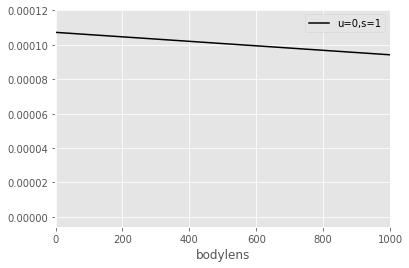

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 使用ggplot的样式
plt.style.use('ggplot')

# 本次需求的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
## 其中 rn1 是输入数据，是一个list或一个np的narray对象；
## hist=True/False，是否绘制直方图，可以添加hist_kws={}，进行详细设置，不在需求内，不赘述；
## kde=True/False，是否绘制核密度曲线，可以添加kde_kws={},进行详细设置，实际使用时，概率密度曲线常使用拟合曲线表示，不赘述；
## fit=stats.norm，拟合模型，一般是正态分布，norm/stats.norm都可以，可以添加fit_kws={}进行消息设置，
### fit_kws={'color':'拟合曲线颜色','label':'图例说明','linestyle':'曲线样式'}
sns.distplot(df.bodylens, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'black', 'label':'u=0,s=1','linestyle':'-'})

# legend()显示图例，savefig()保存图片，show()绘图
plt.legend()
plt.savefig('Demo.png')
plt.xlim(-1,1000)
plt.show()

<AxesSubplot:ylabel='Density'>

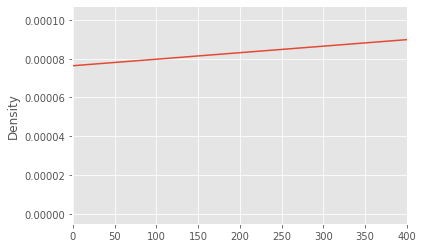

In [100]:
df.bodylens.plot(kind="kde", xlim=(-1,400))

In [101]:
df.bodylens.plot(kind="bar",ylim=(0,500) ,xlim=(-1,400))

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fd894a070d0>
Traceback (most recent call last):
  File "/home/orzwang/.pyenv/versions/3.8.10/lib/python3.8/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


: 

In [28]:
df_vcounts = df.bodylens.value_counts(bins= 10000, normalize=True)

In [29]:
type(df_vcounts)

pandas.core.series.Series

In [30]:
df_vcounts.to_csv("./vcounts.csv", index=True)

In [31]:
df_vcounts

(-1513.0919999999999, 152.409]   0.696
(152.409, 303.818]               0.175
(303.818, 455.227]               0.058
(455.227, 606.636]               0.026
(606.636, 758.046]               0.014
                                  ... 
(550373.078, 550524.488]         0.000
(550524.488, 550675.897]         0.000
(550675.897, 550827.306]         0.000
(550827.306, 550978.715]         0.000
(757046.5, 757197.909]           0.000
Name: bodylens, Length: 10000, dtype: float64